## Optimal number of clusters (Elbow method)

---
* author: Prasert Kanawattanachai
* e-mail: prasert.k@chula.ac.th
* [Chulalongkorn Business School, Thailand](https://www.cbs.chula.ac.th/en/home/)
---

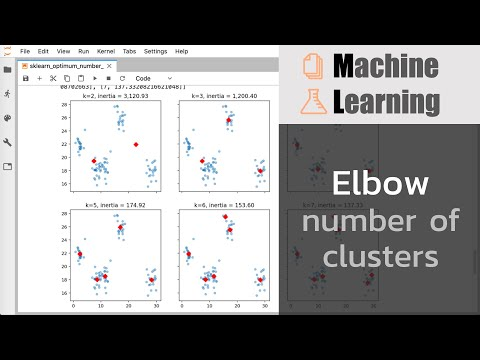

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('U5m1tHawgSI', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")

pandas  version = 1.0.3
numpy   version = 1.18.1


In [4]:
pd.Timestamp.now()

Timestamp('2020-04-22 13:29:11.509887')

In [5]:
from sklearn.datasets import make_blobs, make_classification
X, y = make_blobs(n_samples=100, centers=5, n_features=2, center_box=(0, 30), random_state=7)
# X, y = make_classification(n_samples=100, n_classes=4, n_clusters_per_class=1, n_features=2, n_redundant=0)

In [6]:
X[:5]

array([[13.05750149, 22.89704126],
       [ 0.58090948, 21.59446511],
       [15.12176883,  0.82501345],
       [ 7.79485307, 16.13445408],
       [13.08163581,  2.53486478]])

In [7]:
y

array([1, 0, 3, 4, 3, 1, 2, 0, 0, 0, 1, 4, 4, 0, 3, 1, 2, 2, 0, 3, 2, 4,
       4, 4, 2, 3, 1, 3, 0, 2, 4, 0, 0, 1, 3, 3, 4, 2, 4, 2, 1, 3, 1, 1,
       1, 4, 4, 1, 1, 4, 2, 3, 0, 0, 3, 0, 3, 4, 3, 4, 1, 1, 2, 2, 2, 1,
       1, 2, 0, 3, 2, 1, 0, 2, 0, 0, 3, 3, 3, 3, 4, 2, 4, 1, 1, 0, 4, 2,
       4, 2, 0, 0, 2, 4, 1, 0, 3, 2, 3, 4])

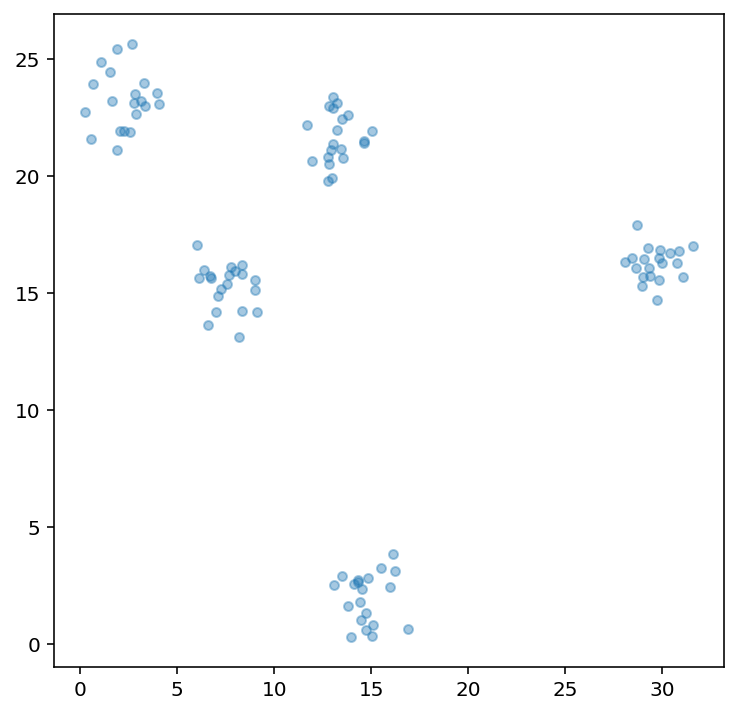

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], s=20, alpha=.4);

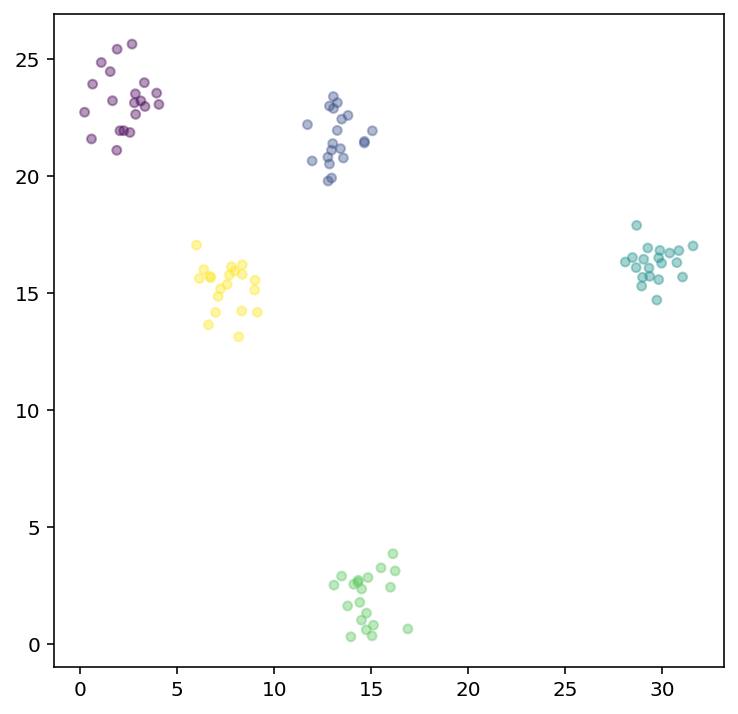

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=.4);

# Scikit-learn: K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=5)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
model.labels_

array([3, 0, 1, 4, 1, 3, 2, 0, 0, 0, 3, 4, 4, 0, 1, 3, 2, 2, 0, 1, 2, 4,
       4, 4, 2, 1, 3, 1, 0, 2, 4, 0, 0, 3, 1, 1, 4, 2, 4, 2, 3, 1, 3, 3,
       3, 4, 4, 3, 3, 4, 2, 1, 0, 0, 1, 0, 1, 4, 1, 4, 3, 3, 2, 2, 2, 3,
       3, 2, 0, 1, 2, 3, 0, 2, 0, 0, 1, 1, 1, 1, 4, 2, 4, 3, 3, 0, 4, 2,
       4, 2, 0, 0, 2, 4, 3, 0, 1, 2, 1, 4])

In [14]:
model.cluster_centers_

array([[ 2.26593052, 23.24404493],
       [14.78949528,  2.00164529],
       [29.64149672, 16.27824686],
       [13.25719219, 21.63398675],
       [ 7.56180272, 15.27699616]])

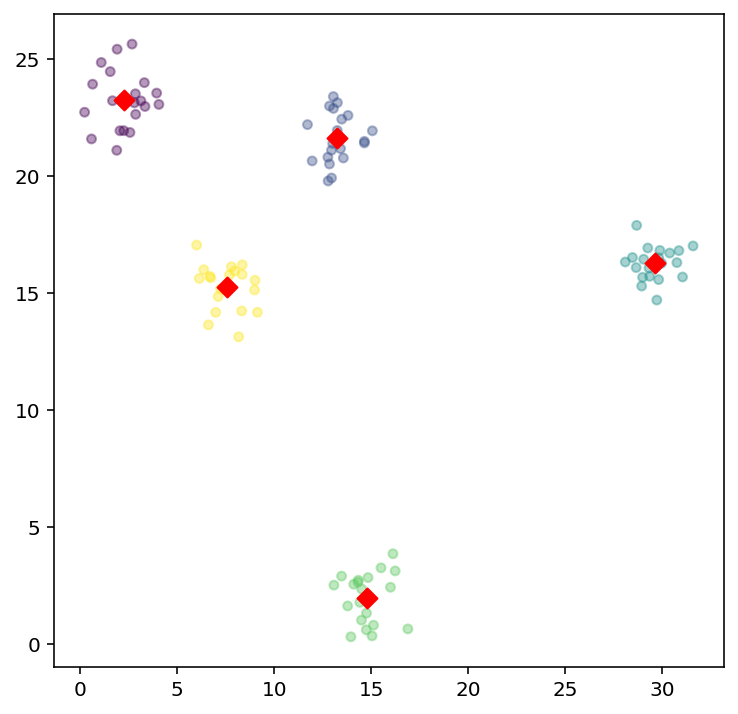

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=.4);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], 
            color='red', marker='D', s=50)

[[1, 14267.981038881935], [2, 6350.108043894181], [3, 2106.0750519879675], [4, 916.1026947379784], [5, 187.61478778826552], [6, 167.46746467149129]]


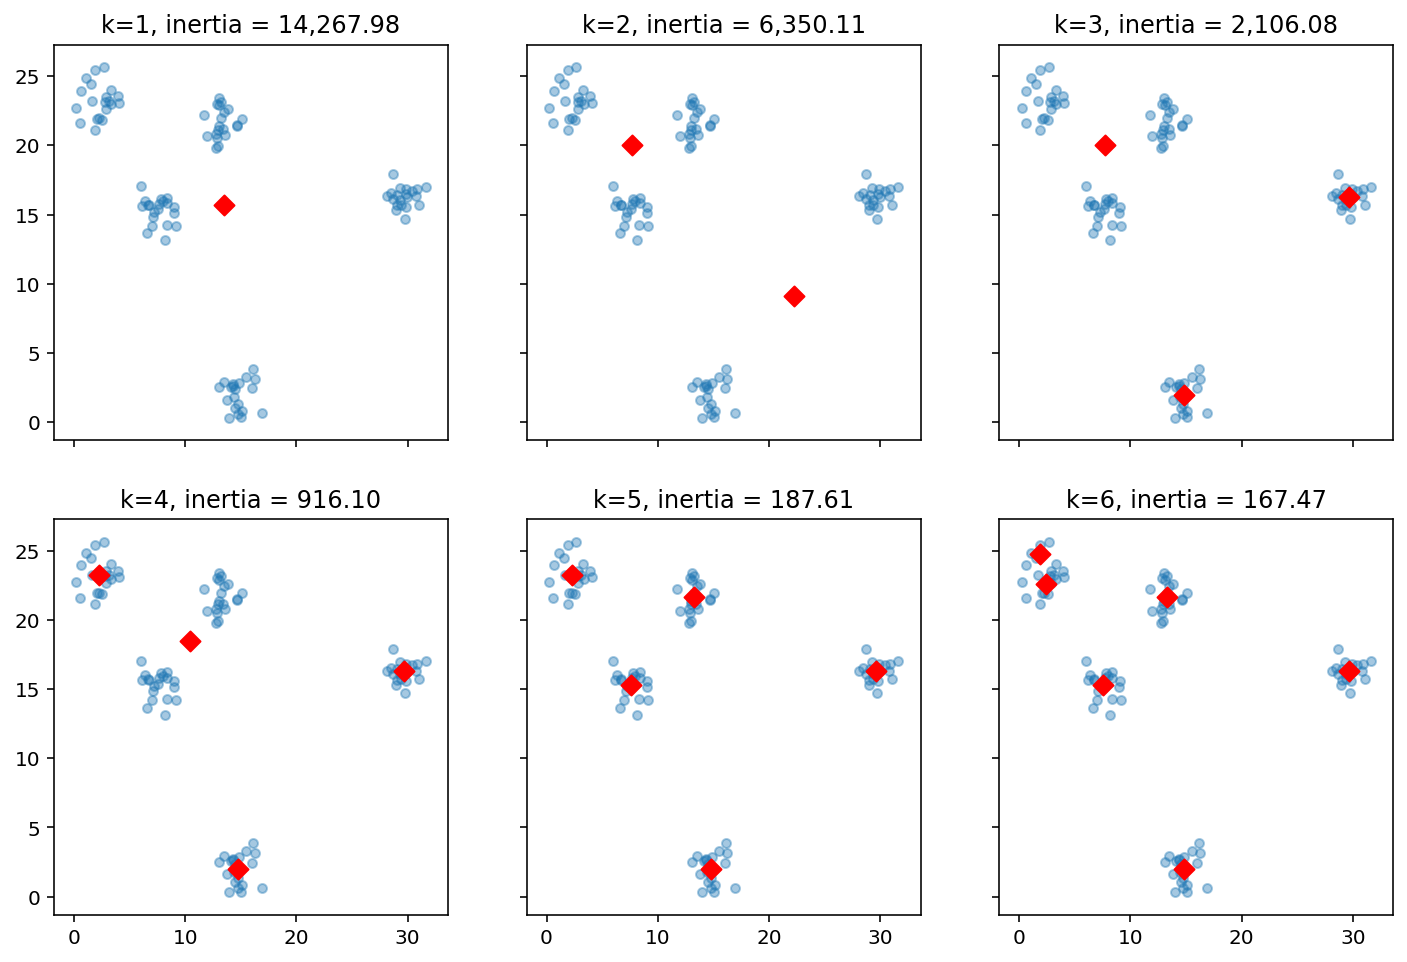

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(12,8), sharex=True, sharey=True)
k=1
ssd=[] # (model.inertia_) Sum of squared distances of samples to their closest cluster center
ax=ax.ravel()
# ax.shape[0]
for i in range(ax.shape[0]):
        ax[i].scatter(X[:, 0], X[:, 1], s=20, alpha=.4)
#         ax[i].scatter(X[:, 0], X[:, 1], s=20, c=y, alpha=.4) # with cluster color
        m=KMeans(n_clusters=k)
        m.fit(X)
        ssd.append([k, m.inertia_])
        ax[i].scatter(m.cluster_centers_[:, 0], m.cluster_centers_[:, 1], color='r', marker='D', s=50)
        ax[i].set_title(f'k={k}, inertia = {m.inertia_:,.2f}')
        k += 1
print(ssd)

In [17]:
xy=np.array(ssd)
print(xy)

[[1.00000000e+00 1.42679810e+04]
 [2.00000000e+00 6.35010804e+03]
 [3.00000000e+00 2.10607505e+03]
 [4.00000000e+00 9.16102695e+02]
 [5.00000000e+00 1.87614788e+02]
 [6.00000000e+00 1.67467465e+02]]


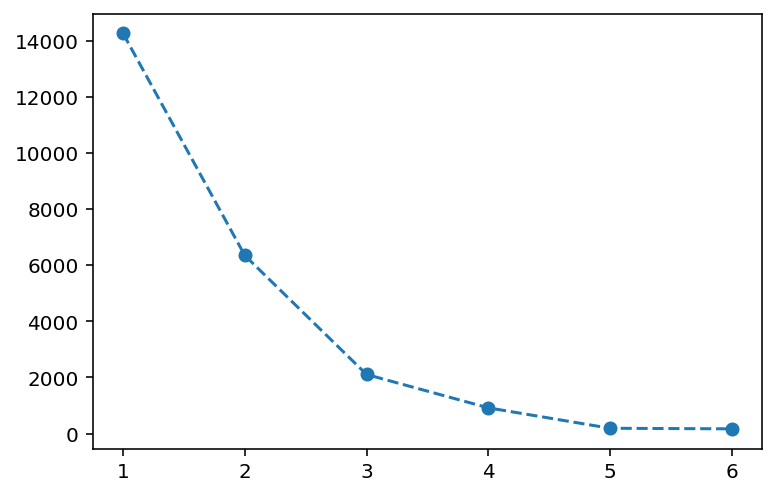

In [18]:
plt.plot(xy[:, 0], xy[:, 1], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [19]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,1,14267.981039
1,2,6350.108044
2,3,2106.075052
3,4,916.102695
4,5,187.614788
5,6,167.467465


In [20]:
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,1,14267.981039,NaN
1,2,6350.108044,-55.493997
2,3,2106.075052,-66.834028
3,4,916.102695,-56.501897
4,5,187.614788,-79.520332
5,6,167.467465,-10.738665


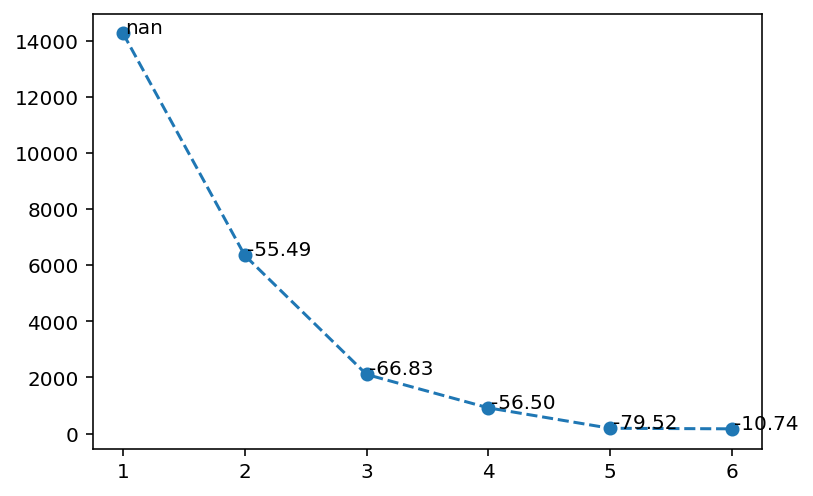

In [21]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)